Machine Learning Exercise Sheet 3 - Ludwig Neste
===

<h2 id="tocheading">Table of Contents</h2>
<div id="toc"></div>

In [1]:
from IPython.display import Markdown as md

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

## Exercise 1: Principal Component Analysis on Iris Dataset 

In [3]:
# First, let's download the data if it is not there:
import os.path as path

def download(url: str):
    file_name = url.split('/')[-1]
    if not path.exists(f'./{file_name}'): 
        import requests
        with open(file_name, 'wb') as file:
            req = requests.get(url,  allow_redirects=True)
            file.write(req.content)
            print(f'Sucessfully downloaded {file_name}')
    return file_name

data_file = download('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
None

In [4]:
# libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('iris.data', sep=',', names=['sepal  length',  'sepal  width',  'petal  length', 'petal  width', 'class'])

In [6]:
data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
# normalise design matrix
X = data.drop(columns=['class'])
y = data.get('class')
X = X-X.mean()
X

,sepal length,sepal width,petal length,petal width
0,-0.743333,0.446,-2.358667,-0.998667
1,-0.943333,-0.054,-2.358667,-0.998667
2,-1.143333,0.146,-2.458667,-0.998667
3,-1.243333,0.046,-2.258667,-0.998667
4,-0.843333,0.546,-2.358667,-0.998667
...,...,...,...,...
145,0.856667,-0.054,1.441333,1.101333
146,0.456667,-0.554,1.241333,0.701333
147,0.656667,-0.054,1.441333,0.801333
148,0.356667,0.346,1.641333,1.101333


In [8]:
# covariance matrix
cov = X.T@X/(X.shape[0]-1)
# calculate eigenvectors (cov is symmetric, so we can use eigh)
eigenvalues, eigenvectors = np.linalg.eigh(cov)
# This is so the first index is the indexth eigenvector
eigenvectors = eigenvectors.T

In [9]:
# reoder to the highest eigenvalues (strictly speaking not necesary, since eigh is giving already the right order):
order = np.argsort(eigenvalues)[::-1]
eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[order]
eigenvalues, eigenvectors

(array([4.22484077, 0.24224357, 0.07852391, 0.02368303]),
 array([[-0.36158968,  0.08226889, -0.85657211, -0.35884393],
        [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647],
        [ 0.58099728, -0.59641809, -0.07252408, -0.54906091],
        [ 0.31725455, -0.32409435, -0.47971899,  0.75112056]]))

In [10]:
# now reduce the dimension of the dataset:
X_reduced = X@eigenvectors[:,:2]
X_reduced

,0,1
0,-1.125612,1.994712
1,-1.381564,1.613402
2,-1.236038,1.802533
3,-1.149333,1.602051
4,-1.023799,2.059457
...,...,...
145,0.841599,-1.185501
146,0.414863,-1.334343
147,0.818740,-1.104726
148,1.401209,-1.054034


Text(0, 0.5, 'Principle Component 2')

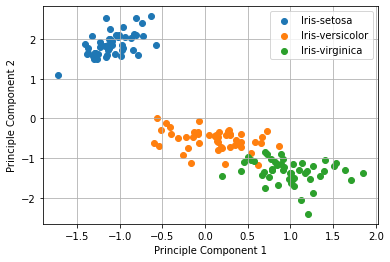

In [11]:
# plot the result
colors, labels = y.factorize()
for idx, label in enumerate(labels):
    plt.scatter(x=X_reduced[0][colors==idx], y=X_reduced[1][colors==idx], label=label)
plt.grid()
plt.legend()
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2')

## Exercise 2: Find principle Component

Eigenvalue-Equation:
$$
\mathrm{det}\left(\Sigma -\lambda \mathbb{1}\right) = 0\\
\Leftrightarrow 
\mathrm{det}
\begin{pmatrix}
\sigma^2 - \lambda & \sigma^2 \rho  & 0 \\
\sigma^2 \rho & \sigma^2 - \lambda & \sigma^2 \rho \\
0&\sigma^2 \rho &  \sigma^2 - \lambda  \\
\end{pmatrix}
= 0
= \left(\sigma^2 - \lambda\right)\left(\right)
$$

In [12]:
import sympy
sympy.init_printing()

In [13]:
sig, rho, lam = sympy.symbols(r"\sigma, \rho, \lambda")
M = sympy.Matrix([[sig**2-lam, sig**2*rho, 0], [sig**2*rho, sig**2-lam, sig**2*rho], [0, sig**2*rho, sig**2-lam]])
det = sympy.det_quick(M)
det

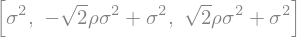

In [14]:
solutions = sympy.solve(det, lam)
solutions

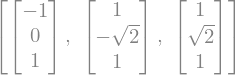

In [15]:
eigv = []
for solution in solutions:
    eigv += M.subs(lam, solution).nullspace()

eigv

The eigenvectors (not normalized), and thus the principle components, are 
$$
\vec v_0 = 
\begin{pmatrix}
-1\\0\\1
\end{pmatrix}
$$
with eigenvalue $\lambda_0=\sigma^2$ and 
$$
\vec v_\pm = 
\begin{pmatrix}
1\\ \pm\mathrm{sgn}\left({\rho}\right)\sqrt{2}\\1
\end{pmatrix}
$$ with eigenvalue $\lambda_\pm=\sigma^2\left(1\pm\sqrt{2} |\rho|\right)$.

Where $\lambda_+$ is the biggest eigenvalue, followed by $\lambda_0$, followed by $\lambda_-$.

Where the explained variance of each is:
$$
\eta_\pm = \frac{1\pm\sqrt{2}|\rho|}{3}\\
\eta_0   = \frac{1}{3}
$$

## Exercise 3: Overfitting of Logistic Regression

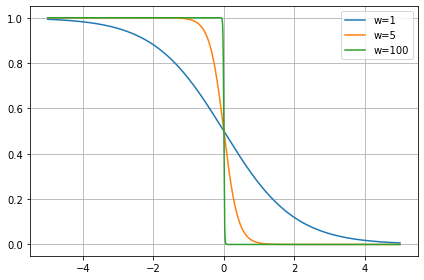

In [16]:
def sigmoid(x, w=1):
    return 1/(1+np.exp(x*w))
x = np.linspace(-5, 5, 1000)
plt.plot(x, sigmoid(x, 1), label='w=1')
plt.plot(x, sigmoid(x, 5), label='w=5')
plt.plot(x, sigmoid(x, 100), label='w=100')
plt.legend()
plt.grid()
plt.tight_layout()

Some Quick Ideas: 
The gradient vanishes for high weights

## Exercise 4

### (a) 
First observe that the second algorithm is the more general one. In fact the first algorithm is a subset of the second one. To see that make the Rectangle 'infinitely' large on all axis except BP and BMI.
The first Algorithm has less parameters to fit, so we are, among other things, less prone to overfitting.
The second Algorithm is more general and is able to aproximate the underlying data more accurately.

### (b)
The more labeled training samples I have, the more I would choose the second algorithm over the first.

## Exercise 5
The consequence is that Data Scientists will still have jobs in the foreseeable future. There is no general Hypothesis class to solve every problem. 
In praxis for each new ML task, we need to get familiar with the data and the problem and construct an apropreate hypothesis class. This is what we do, when we for example construct a neural network.  

## Exercise 6 

In [17]:
x = np.array([2, 3, 4, 11, 12, 12, 7, 8, 8], dtype=np.float64)
y = np.array([3, 1, 2, 5, 4, 6, 5, 4, 6], dtype=np.float64)

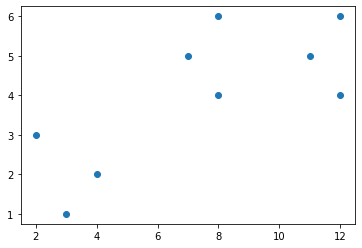

In [18]:
plt.scatter(x, y)

In [19]:
def k_means(X, k0, tol=1e-5, nmax=100):
    shape = k0.shape
    k = k0.reshape((shape[0], 1, shape[1]))
    
    # for paralelisation
    multi = np.array(shape[0]*[X])
    label_types = np.array(np.arange(shape[0])).reshape((shape[0],1))
    
    for n in range(nmax):
        D = multi-k
        # calc euclidean distance
        D = np.sum(D**2, axis=2)
        labels = np.argmin(D, axis=0)

        masks = labels==label_types
        
        knew = np.empty(k.shape)
        for idx, mask in enumerate(masks):
            n = mask.sum()
            knew[idx] = np.sum(X[mask], axis=0)
            if n>0:
                knew[idx] /= n
        
        
        if np.sum(np.abs(k-knew)) <= tol:
            break
        
        k = knew
    
    
    return labels, n

Text(0.5, 1.0, '6 steps')

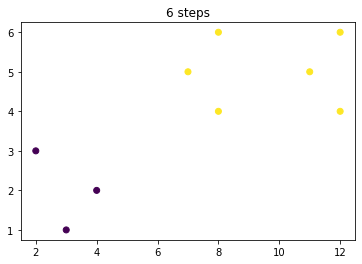

In [20]:
X = np.array([x, y]).T
k0 = np.array([X[1], X[7]])
labels, n = k_means(X, k0)
plt.scatter(x, y, c=labels)
plt.title(f"{n} steps")

### (b)

Text(0.5, 1.0, '3 steps')

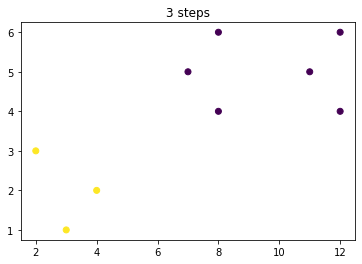

In [21]:
k0 = np.array([X[7], X[1]])
labels, n = k_means(X, k0)
plt.scatter(x, y, c=labels)
plt.title(f"{n} steps")

I can not find any pair which gives different clusters, it always converges to the same value.

## Exercise 7

$f$ is $\rho$-Lipschitz $\Leftrightarrow  |f(x_1) - f(x_2)| \le \rho ||x_1 - x_2||.$

Divide $[-1, 1]^n$ in $N=\left\lceil\frac{2\rho\sqrt{n}}{\epsilon}\right\rceil\ge\frac{2\rho\sqrt{n}}{\epsilon}$ equal length boxes in each dimension. Each Box then has a side length of $L=\frac{2}{N}$ and the two most distant points in the box are $L\sqrt{n}$ (euclidean norm, works with any other norm, though).
Thus for such a Box $B$ with $x_1, x_2 \in B$ we find:
$$
|f(x_1) - f(x_2)| \le \rho ||x_1 - x_2|| \le \rho \frac{2\sqrt{n}}{N} \le \epsilon
$$

Next we are going to construct a Network with two hidden Layers $V_1, V_2$. The first Layer will have a for each coordinate $x_i$, and each $j=0\dots N$ division a neuron $N_{i,j}$ which outputs $\approx 1$ if $x_i>\frac{2j}{N}-1$ and else $\approx 0$.

The second hidden layer will have for each of the $N^n$ Boxes one neuron, which outputs $\approx 1$ if the current vector is in that box. (The corner cases here will be hard: if we transition from exaclty one box to exactly one other, it will be a monotone transition from one value to the other. If we transition through more than 2 boxex though, we will decline to 0 before going back to the box value again. 
The problem of the corners of the boxes, will indefinetly remain in my proof. This means the inequality we have to show is not furfilled at all the points where more than 2 Boxes touch.)

Let $V_0 = \{a_1, \dots, a_n\}$ denote the input layer, with inputs $a_i=x_i$. 
Define the first hidden layer by $V_1=\{N_{i,j} | i=1\dots n, j=0\dots N\}$ with 
$$
N_{i,j}(a_1, \dots, a_n) = w\cdot\left(a_i+1-\frac{2j}{N}\right)=\underbrace{w}_{\text{i-th weight}}a_i+\underbrace{w-w\frac{2j}{N}}_{\text{bias}}
$$

Where $w$ is the same for each neuron. The activation funciton $\sigma$ is given by the sigmoid function 
$$
\sigma(x) = \frac{1}{1+e^{-x}} = 1-\sigma(-x).
$$

We need to proof $|\sigma(x)-\Theta(x)| < \epsilon > 0 \forall |x|>\log(\frac{1}{\epsilon}-1)$, that is: if x is high enough, the sigmoid function aproximates the heaviside funciton arbritrary well. Since $\sigma(x)=1-\sigma(-x)$, we can show it $x<0$, and are done:
$$
|\sigma(x)-\Theta(x)| = \frac{1}{1+e^{|x|}} < \epsilon \forall x < 0\\
\Leftrightarrow 
|x| > \log (\frac{1}{\epsilon}-1).
$$

This means, the output of the first hidden layer $o_{i,j}=\sigma(N_{i,j})$ approximates $\Theta(a_i+1-\frac{2j}{N})$ abitrarily sharp, if we choose $w>0$ high enough.
In our context: if we want to be able to approach the borders of the boxes with a distance $\delta$ with an error of less then $\epsilon$, we have to choose 
$$
w > \frac{1}{\delta} \log(\frac{1}{\epsilon}-1)
$$

Define the second hidden layer by $V_2=\{B_{k_1,\dots,k_n}|k_i=1\dots N\}$ with 
$$
B_{k_1,\dots,k_n} = \tilde w \left(\sum_{i=1}^n\left(o_{i,k_i-1}-o_{i,k_i}\right) - n + 0.5\right)
$$
Where $\tilde w$ is again choosen as high, as the sharpness needs to be.
The output of the second hidden layer is $\tilde o_{k_1,\dots,k_n} = \sigma(B_{k_1,\dots,k_n})$.

$\tilde o_{k_1,\dots,k_n}$ now is only approximately one, if the input vector is in Box number ${k_1,\dots,k_n}$. This works by summing up each dimension where the coordinate is right (brackets in the sum) and then substracting the number of dimensions and adding a half. Thus if all dimensions are right, this turns out to be 0.5, and if not, it is less than -0.5. (so we can emediately see, $\tilde w$ should be much bigger than 2).

The output layer $V_3 = {O}$ then outputs 
$$
O = \sum_{k_1=1}^{N}\dots \sum_{k_n=1}^{N} \sigma(B_{k_1,\dots,k_n}) \bar f_{k_1,\dots,k_n}
$$

Where $\bar f_{k_1,\dots,k_n}$ is the average value of $f$ in the Box number ${k_1,\dots,k_n}$.
Alternatively we could take for example the value at the center of the Box, and the proof still works:
$$
\bar f_{k_1,\dots,k_n} = f\left (\frac{2(k_1+0.5)}{N}-1, \dots, \frac{2(k_n+0.5)}{N}-1\right)
$$